<a href="https://colab.research.google.com/github/Sivaramjallu001/GSTIN_Certificate_Verification/blob/main/Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install pytesseract and Tesseract OCR engine
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pytesseract
from PIL import Image

# Load the correct image file (replace with your image path)
img = Image.open("/content/gst_certificate.jpeg")

# Extract text from the image using OCR
text = pytesseract.image_to_string(img)

print(text)
# Check if the signature warning is present
if "Signature Not Verified" in text:
    print("Warning: Signature not verified in the image.")
else:
    print("No signature warning detected.")


 

wets ot
Government of India
Form GST REG-06
[See Rule 10(1)]
Registration Certificate

Registration Number: 293BALAC7423P1PX

 

1. |Legal Name

2. |Trade Name, if any

ZENVIX DATA LABS PVT. LTD.
ZENVIX DATA LABS PVT. LTD.

 

3. |Additional trade names, if
any

 

4. |Constitution of Business

Private Limited Company

 

Business

Address of Principal Place of

Floor No.: FIFTH FLOOR,

Building No./Flat No.: NO.19

Name Of Premises/Building: Galaxy Arcade
Road/Street: Hosur Road

Locality/Sub Locality: Bommanahalli
City/Town/Village: Bengaluru

District: Bengaluru Urban

State: Karnataka

PIN Code: 560896

 

6. |Date of Liability

 

 

 

 

 

 

 

 

 

 

7. |Period of Validity From 25/10/2024 To Not Applicable
8. |Type of Registration Regular
9. |Particulars of Approving Karnataka
Signature
Signature Not Veiitic
Digitally signed GOODS AND
RVICES TAX HETWORK 07
Date: 2024 .04.2 15:12 IST
Name VIKRAM JAGADEESH REDDY
Designation Deputy Commissioner

 

Jurisdictional Office

LG

In [ ]:
img = Image.open("/content/WhatsApp Image 2025-05-30 at 15.27.00.jpeg")

# Extract text from the image using OCR
text = pytesseract.image_to_string(img)

print(text)

Government of India
Form GST REG-06
[See Rule 10(1)]
Registration Certificate

Registration Number : 29AALCC7423P1ZX

 

Legal Name

CHERVIC ADVISORY SERVICES PRIVATE LIMITED

 

Trade Name, if any

CHERVIC ADVISORY SERVICES PRIVATE LIMITED

 

Additional trade names, if
any

 

Constitution of Business

Private Limited Company

 

Address of Principal Place of
Business

Floor No.: GROUND FLOOR, GAMMA BLOCK
Building No./Flat No.: NO.7

Name Of Premises/Building: Sigma Soft Teck Park
Road/Street: Whitefield Road

Locality/Sub Locality: Whitefield
City/Town/Village: Bengaluru

District: Bengaluru Urban

State: Karnataka

PIN Code: 560066

 

Date of Liability

 

Period of Validity

From 24/04/2024 Not Applicable

 

 

 

 

Type of Registration

Regular

 

 

Particulars of Approving

 

Karnataka

 

Signature

Signature Not

Digitally signed GOODS AND
SERVICES TAX METWORK 07
Date: 2024,04.24410:15:12 IST

 

Name

SUNIL PAWAR GOVINDANAIK

 

Designation

Assistant Commissioner

 

J

Detected signature-related text and coordinates:

Text: 'Not' | Position: x=1732, y=1906, w=59, h=29
Text: 'Signature' | Position: x=840, y=2304, w=131, h=30
Text: 'Not' | Position: x=981, y=2305, w=46, h=23
Text: 'Note:' | Position: x=129, y=2776, w=88, h=28

⚠️ Signature-related texts are NOT horizontally aligned.


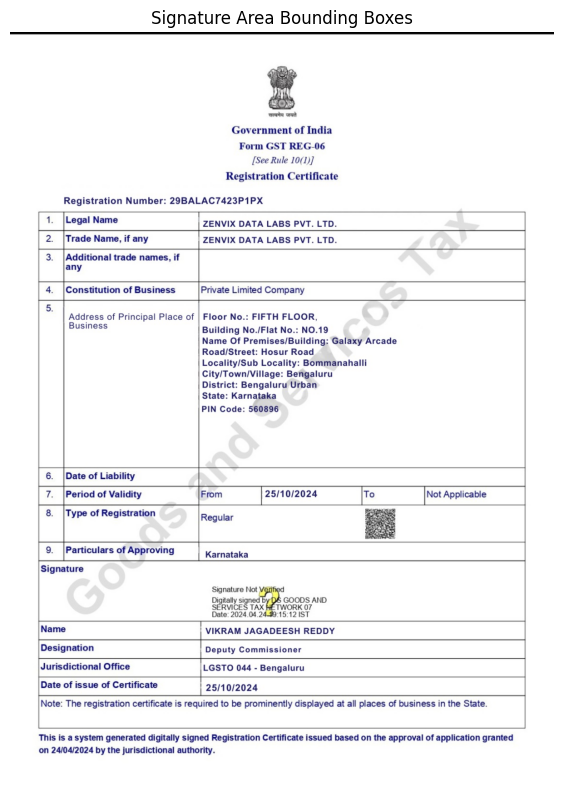

In [2]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load image in grayscale
img_path = "/content/gst_certificate.jpeg"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Preprocessing for better OCR
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
gray = cv2.medianBlur(gray, 3)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Run OCR with position data
data = pytesseract.image_to_data(thresh, output_type=pytesseract.Output.DICT)

# Store signature-related boxes
signature_boxes = []

print("Detected signature-related text and coordinates:\n")
for i, word in enumerate(data['text']):
    if word.strip() == "":
        continue
    if "signature" in word.lower() or "verified" in word.lower() or "not" in word.lower():
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        signature_boxes.append((x, y, w, h))
        print(f"Text: '{word}' | Position: x={x}, y={y}, w={w}, h={h}")

# Check alignment: Are y-values of bounding boxes close?
if len(signature_boxes) >= 2:
    y_vals = [y for (_, y, _, _) in signature_boxes]
    y_diff = max(y_vals) - min(y_vals)
    if y_diff < 20:
        print("\n✅ Signature-related texts are horizontally aligned.")
    else:
        print("\n⚠️ Signature-related texts are NOT horizontally aligned.")
else:
    print("\n❌ Not enough signature-related text detected.")

# Draw boxes for visual verification
for (x, y, w, h) in signature_boxes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Signature Area Bounding Boxes")
plt.axis("off")
plt.show()


In [5]:
import cv2
import pytesseract

# Load image and preprocess
def preprocess(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img, thresh

# Extract coordinates for keywords
def extract_signature_keywords(thresh_img):
    data = pytesseract.image_to_data(thresh_img, output_type=pytesseract.Output.DICT)
    keywords = ["?", "signature", "digitally", "verified"]
    boxes = {}

    for i, word in enumerate(data['text']):
        word_clean = word.strip().lower()
        for key in keywords:
            if key in word_clean:
                x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
                boxes[key] = (x, y, w, h)
    return boxes

# Compare bounding box coordinates with reference
def compare_positions(ref_boxes, test_boxes, tolerance=50):
    for key in ref_boxes:
        if key not in test_boxes:
            print(f"❌ Keyword '{key}' not found in test image.")
            return False
        rx, ry, _, _ = ref_boxes[key]
        tx, ty, _, _ = test_boxes[key]
        if abs(rx - tx) > tolerance or abs(ry - ty) > tolerance:
            print(f"❌ Keyword '{key}' misaligned: Ref ({rx},{ry}) vs Test ({tx},{ty})")
            return False
    print("✅ All key signature elements are aligned correctly.")
    return True

# ---------- Run the Comparison ----------
# Reference image: a known valid GSTIN certificate
ref_img_path = "/content/gst_certificate.jpeg"
test_img_path = "/content/WhatsApp Image 2025-05-30 at 15.27.00.jpeg"

ref_img, ref_thresh = preprocess(ref_img_path)
test_img, test_thresh = preprocess(test_img_path)

ref_boxes = extract_signature_keywords(ref_thresh)
test_boxes = extract_signature_keywords(test_thresh)

compare_positions(ref_boxes, test_boxes)


✅ All key signature elements are aligned correctly.


True

In [6]:
import cv2
import pytesseract

# Load image and preprocess
def preprocess(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return img, thresh

# Extract coordinates for keywords
def extract_signature_keywords(thresh_img):
    data = pytesseract.image_to_data(thresh_img, output_type=pytesseract.Output.DICT)
    keywords = ["?", "signature", "digitally", "verified"]
    boxes = {}

    for i, word in enumerate(data['text']):
        word_clean = word.strip().lower()
        for key in keywords:
            if key in word_clean:
                x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
                boxes[key] = (x, y, w, h)
    return boxes

# Compare bounding box coordinates with reference
def compare_positions(ref_boxes, test_boxes, tolerance=15):
    for key in ref_boxes:
        if key not in test_boxes:
            print(f"❌ Keyword '{key}' not found in test image.")
            return False
        rx, ry, _, _ = ref_boxes[key]
        tx, ty, _, _ = test_boxes[key]
        if abs(rx - tx) > tolerance or abs(ry - ty) > tolerance:
            print(f"❌ Keyword '{key}' misaligned: Ref ({rx},{ry}) vs Test ({tx},{ty})")
            return False
    print("✅ All key signature elements are aligned correctly.")
    return True

# ---------- Run the Comparison ----------
# Reference image: a known valid GSTIN certificate
ref_img_path = "/content/gst_certificate.jpeg"
test_img_path = "/content/WhatsApp Image 2025-05-30 at 15.27.00.jpeg"

ref_img, ref_thresh = preprocess(ref_img_path)
test_img, test_thresh = preprocess(test_img_path)

ref_boxes = extract_signature_keywords(ref_thresh)
test_boxes = extract_signature_keywords(test_thresh)

compare_positions(ref_boxes, test_boxes)


❌ Keyword 'signature' misaligned: Ref (840,2304) vs Test (846,2266)


False